In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("houseprice.csv")

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.shape

(1460, 81)

# Missing Values 

In [5]:
containingNanVars = []

In [6]:
for key, value in data.iteritems():
    if value.isnull().any():
        print ("{} : {:.2f}% ".format(key.rjust(15), value.isnull().sum()*100/value.shape[0])) # percentage of missing values
        containingNanVars.append(key)

    LotFrontage : 17.74% 
          Alley : 93.77% 
     MasVnrType : 0.55% 
     MasVnrArea : 0.55% 
       BsmtQual : 2.53% 
       BsmtCond : 2.53% 
   BsmtExposure : 2.60% 
   BsmtFinType1 : 2.53% 
   BsmtFinType2 : 2.60% 
     Electrical : 0.07% 
    FireplaceQu : 47.26% 
     GarageType : 5.55% 
    GarageYrBlt : 5.55% 
   GarageFinish : 5.55% 
     GarageQual : 5.55% 
     GarageCond : 5.55% 
         PoolQC : 99.52% 
          Fence : 80.75% 
    MiscFeature : 96.30% 


In [7]:
data[containingNanVars[0]].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: LotFrontage, Length: 1460, dtype: bool

In [8]:
def analyseMissingValues(df, var):
    df = df.copy() # making a copy of dataframe and making changes in it
    # make a new variable column in the dataframe which indicates the row contains the null value or not
    df['flag'] = np.where(df[var].isnull(), 'Null', 'Not Null')
#     print(df['flag'])
#     print(df.groupby(['flag'])['SalePrice'].median())
    df.groupby(['flag'])['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.show()
    print("Count of null values {} out of {}".format(df[var].isnull().sum(), df.shape[0]))


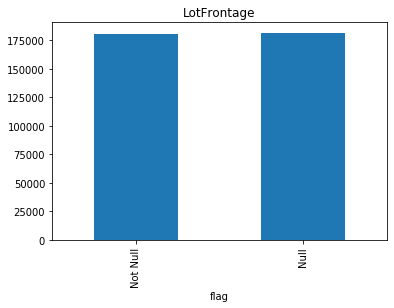

Count of null values 259 out of 1460


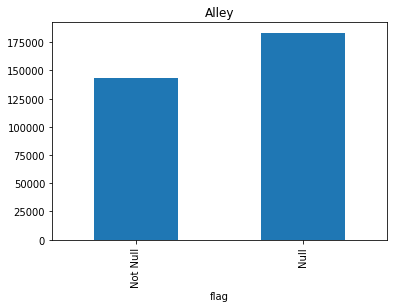

Count of null values 1369 out of 1460


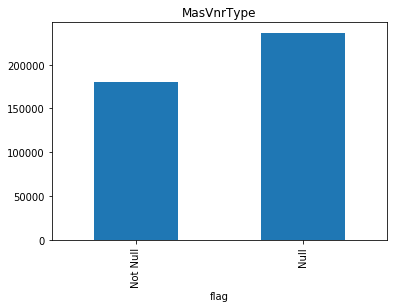

Count of null values 8 out of 1460


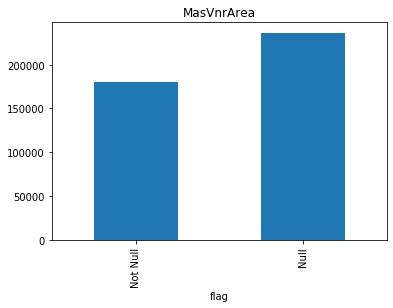

Count of null values 8 out of 1460


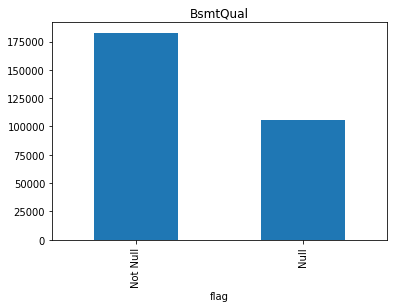

Count of null values 37 out of 1460


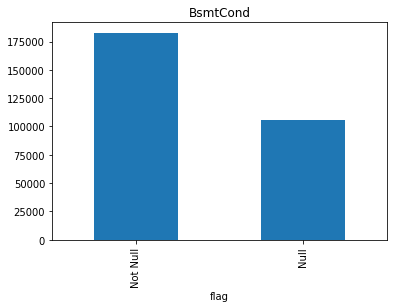

Count of null values 37 out of 1460


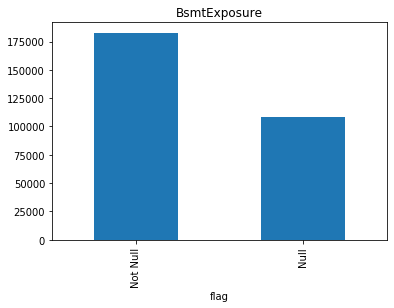

Count of null values 38 out of 1460


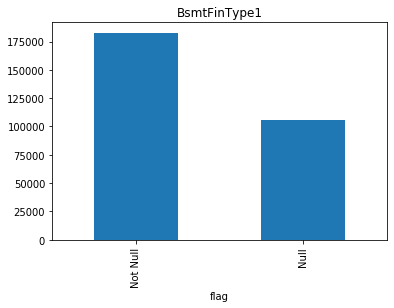

Count of null values 37 out of 1460


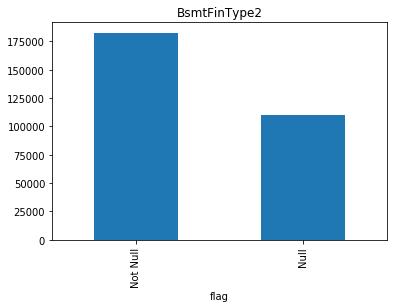

Count of null values 38 out of 1460


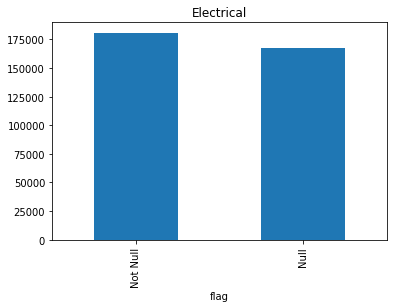

Count of null values 1 out of 1460


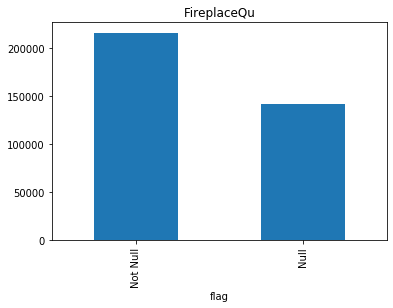

Count of null values 690 out of 1460


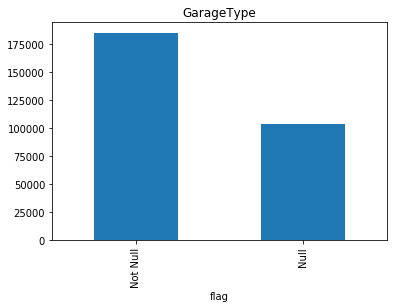

Count of null values 81 out of 1460


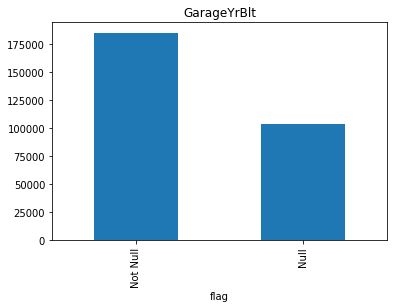

Count of null values 81 out of 1460


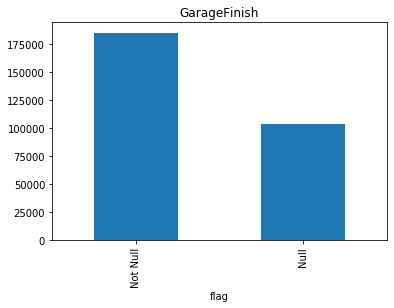

Count of null values 81 out of 1460


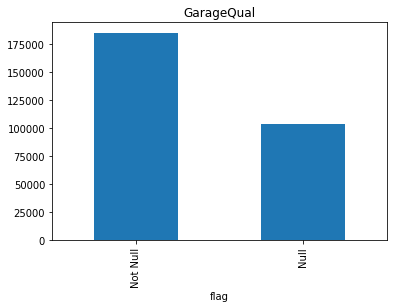

Count of null values 81 out of 1460


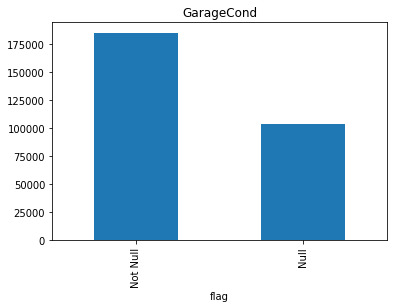

Count of null values 81 out of 1460


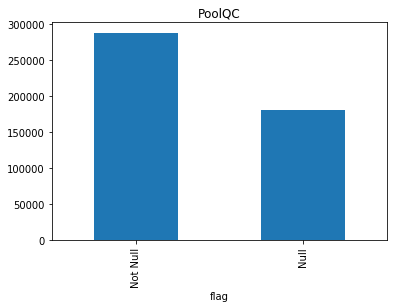

Count of null values 1453 out of 1460


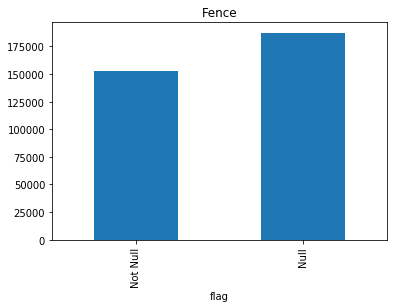

Count of null values 1179 out of 1460


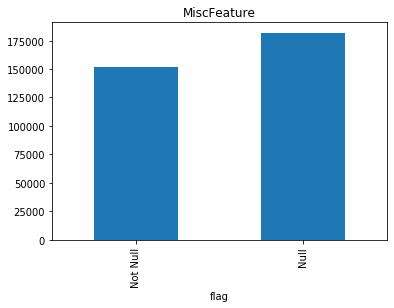

Count of null values 1406 out of 1460


In [9]:
for var in containingNanVars:
    analyseMissingValues(data, var)

# Numerical Variables 

In [10]:
containingNumericalVars = []

In [11]:
for key, value in data.iteritems():
    if data[key].dtypes != object:
        containingNumericalVars.append(key)

In [12]:
print(len(containingNumericalVars))

38


In [13]:
print("Variables containing Numerical values:")
for var in containingNumericalVars:
    print(var)

Variables containing Numerical values:
Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [14]:
data[containingNumericalVars].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [15]:
for var in containingNumericalVars:
    print("{}: {}".format(var.rjust(15), data[var].unique().shape[0]))

             Id: 1460
     MSSubClass: 15
    LotFrontage: 111
        LotArea: 1073
    OverallQual: 10
    OverallCond: 9
      YearBuilt: 112
   YearRemodAdd: 61
     MasVnrArea: 328
     BsmtFinSF1: 637
     BsmtFinSF2: 144
      BsmtUnfSF: 780
    TotalBsmtSF: 721
       1stFlrSF: 753
       2ndFlrSF: 417
   LowQualFinSF: 24
      GrLivArea: 861
   BsmtFullBath: 4
   BsmtHalfBath: 3
       FullBath: 4
       HalfBath: 3
   BedroomAbvGr: 8
   KitchenAbvGr: 4
   TotRmsAbvGrd: 12
     Fireplaces: 4
    GarageYrBlt: 98
     GarageCars: 5
     GarageArea: 441
     WoodDeckSF: 274
    OpenPorchSF: 202
  EnclosedPorch: 120
      3SsnPorch: 20
    ScreenPorch: 76
       PoolArea: 8
        MiscVal: 21
         MoSold: 12
         YrSold: 5
      SalePrice: 663


# Temporal Values 

In [16]:
containingTemporalVar = []

In [17]:
for key, value in data.iteritems():
    if 'Yr' in key or 'Year' in key:
        containingTemporalVar.append(key)

In [18]:
containingTemporalVar

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

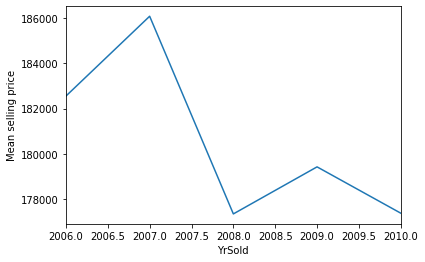

In [19]:
data.groupby('YrSold')['SalePrice'].mean().plot()
plt.ylabel('Mean selling price')
plt.show()

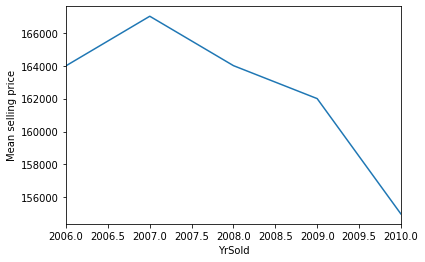

In [20]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Mean selling price')
plt.show()

In [21]:
def relation_year_vars_and_saleprice(df, var):
    df = df.copy()
    df['dif'] = df['YrSold'] - df[var]
    plt.scatter(df['dif'], df['SalePrice'])
    plt.ylabel('Sales Price')
    plt.xlabel(var)
    plt.show()

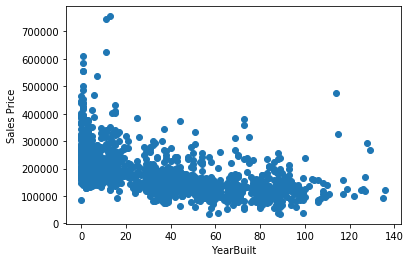

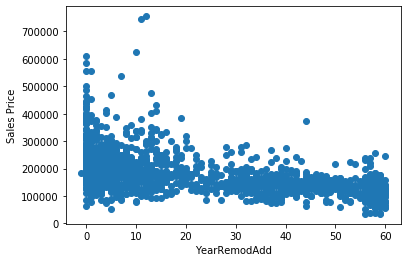

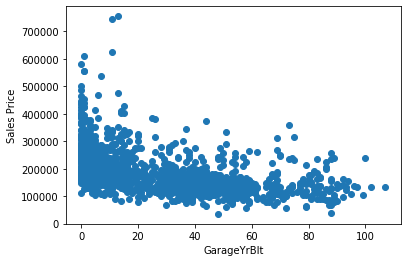

In [22]:
for var in containingTemporalVar:
    if var != 'YrSold':
        relation_year_vars_and_saleprice(data, var)

# Discrete Variables

In [23]:
containingDiscreteVars = []

In [24]:
for key in containingNumericalVars:
    # if number of unique values are less than 20 we are concluding that is a discrete variable
    if len(data[key].unique()) < 20 and key not in containingTemporalVar + ['Id']:
        print("{}: {}".format(key.ljust(15), len(data[key].unique())))
        containingDiscreteVars.append(key)

MSSubClass     : 15
OverallQual    : 10
OverallCond    : 9
BsmtFullBath   : 4
BsmtHalfBath   : 3
FullBath       : 4
HalfBath       : 3
BedroomAbvGr   : 8
KitchenAbvGr   : 4
TotRmsAbvGrd   : 12
Fireplaces     : 4
GarageCars     : 5
PoolArea       : 8
MoSold         : 12


In [25]:
print(containingDiscreteVars)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold']


In [26]:
print(len(containingDiscreteVars))

14


In [27]:
def relationship_discrete_vars_and_salesprice(df, var):
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Sales price')
    plt.show()

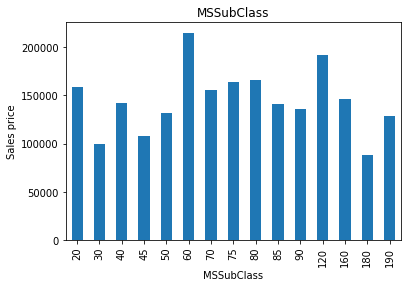

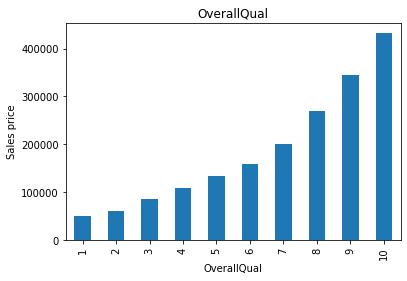

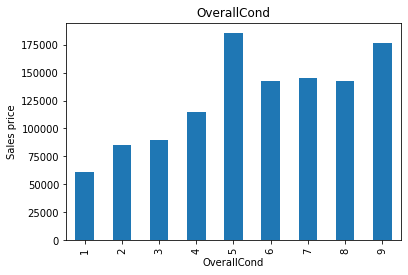

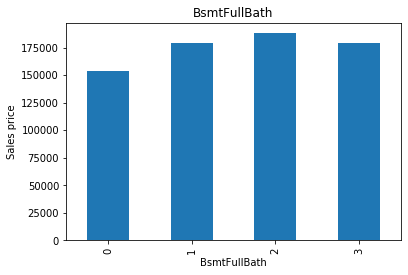

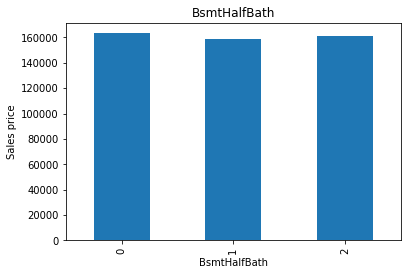

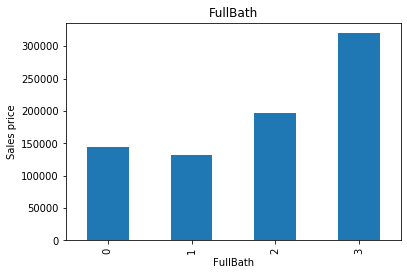

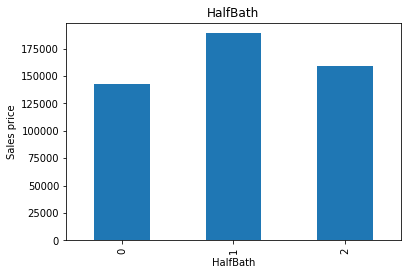

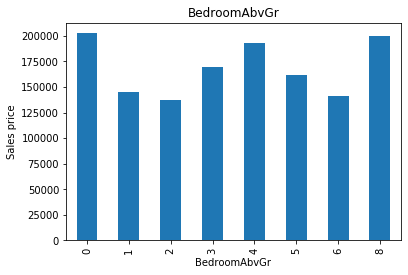

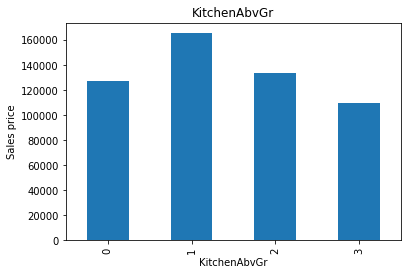

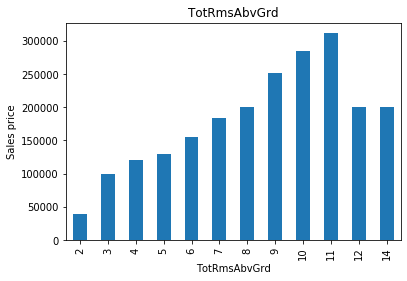

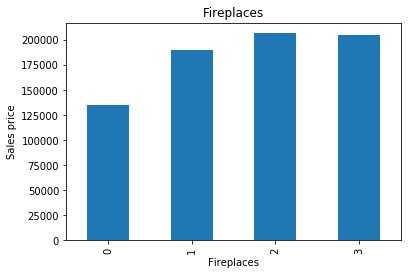

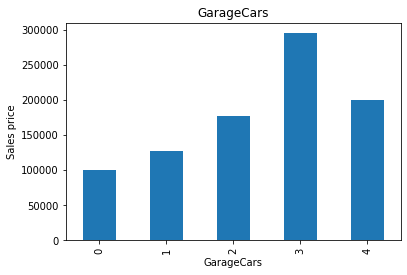

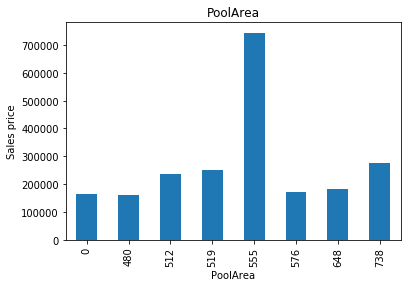

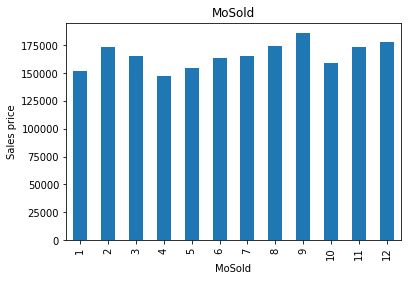

In [28]:
for var in containingDiscreteVars:
    relationship_discrete_vars_and_salesprice(data, var)

# Continous Variables 

In [29]:
containingContinousVars = []

In [30]:
for var in containingNumericalVars:
    if var not in containingTemporalVar + containingDiscreteVars + ['Id']:
        containingContinousVars.append(var)

In [31]:
print(containingContinousVars)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


In [32]:
print(len(containingContinousVars))

19


In [33]:
data[containingContinousVars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [34]:
def analyseContinousVars(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.title(var)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.show()

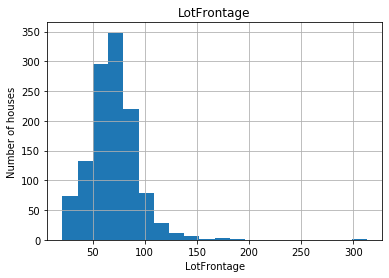

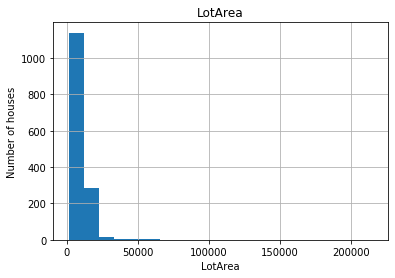

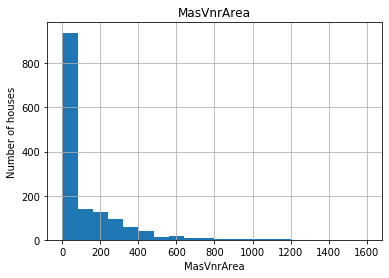

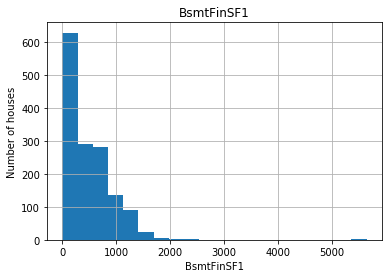

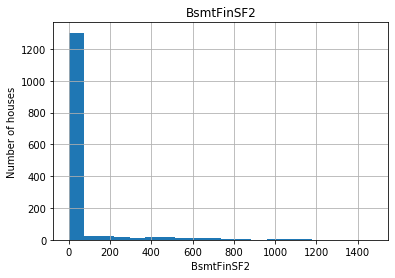

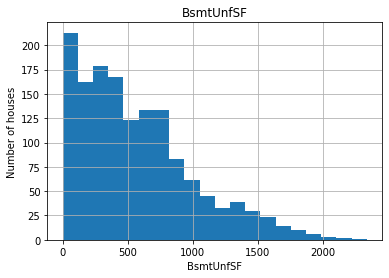

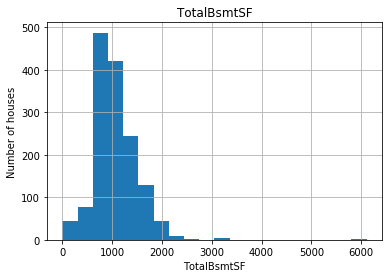

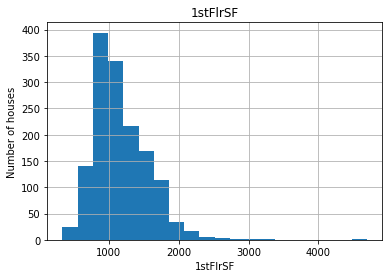

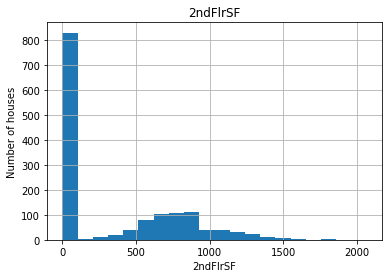

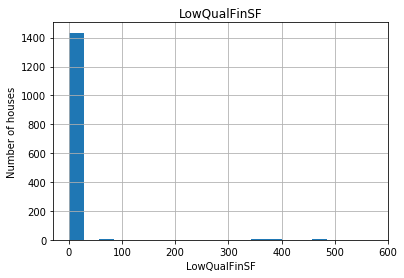

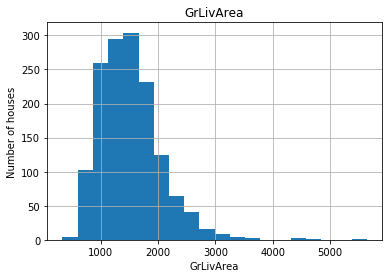

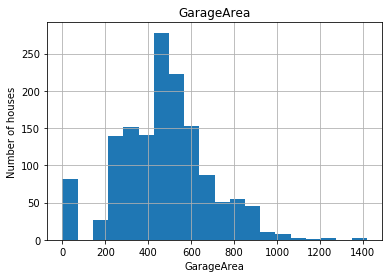

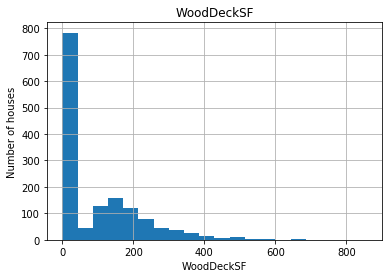

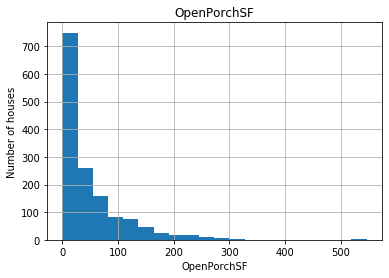

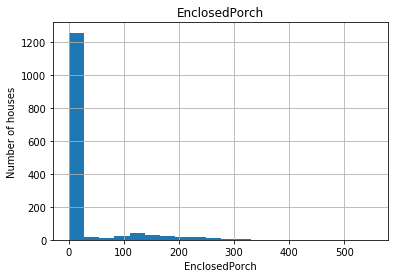

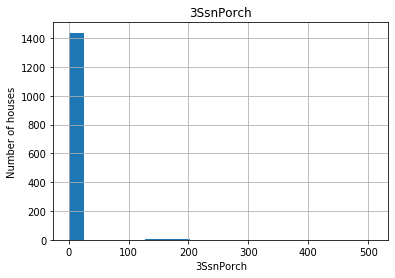

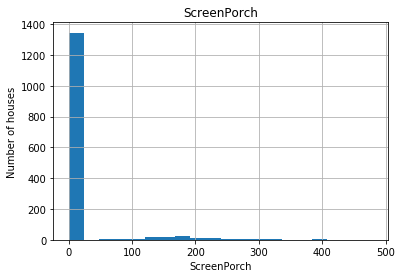

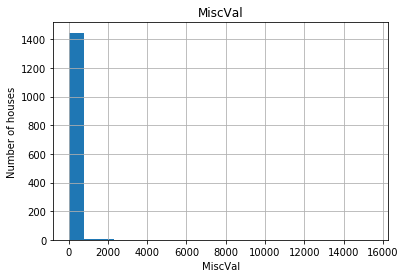

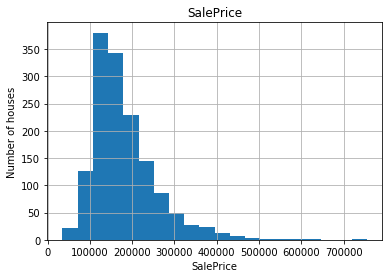

In [35]:
for var in containingContinousVars:
    analyseContinousVars(data, var)

In [36]:
def analyseDistributedData(df, var):
    if 0 in df[var].unique():
        return
    df = df.copy()
    df[var] = np.log(df[var])
    df[var].hist(bins=20)
    plt.title(var)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.show()

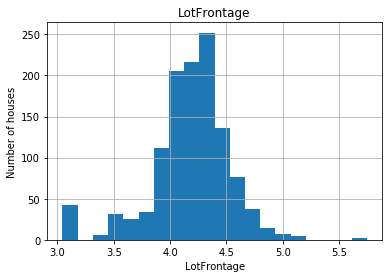

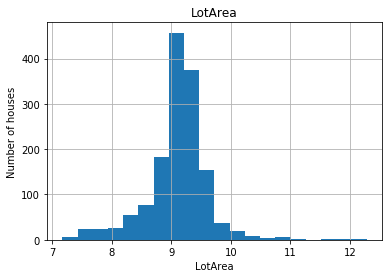

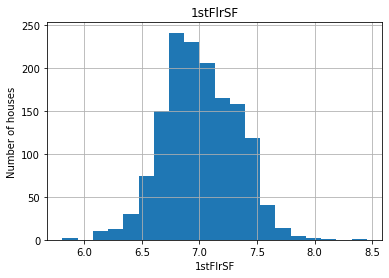

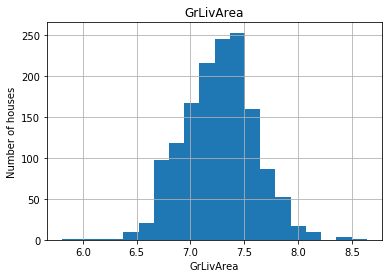

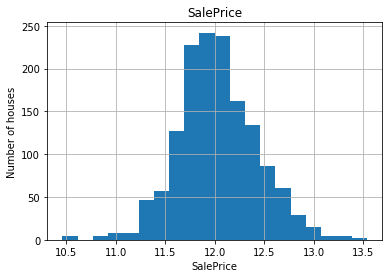

In [37]:
for var in containingContinousVars:
    analyseDistributedData(data, var)

In [38]:
def analyseDistributedDataWithSaleprice(df, var):
    if 0 in df[var].unique():
        return
    df = df.copy()
    df[var] = np.log(df[var])
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.title(var)
    plt.ylabel('Sale price')
    plt.xlabel(var)
    plt.show()

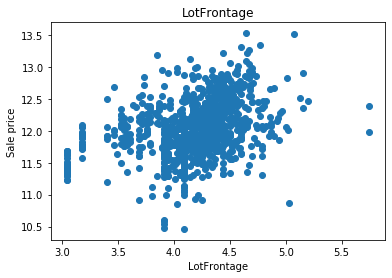

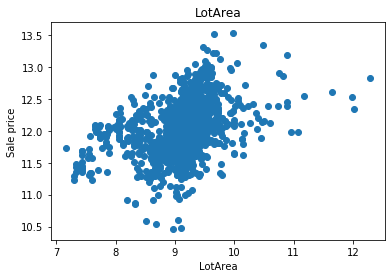

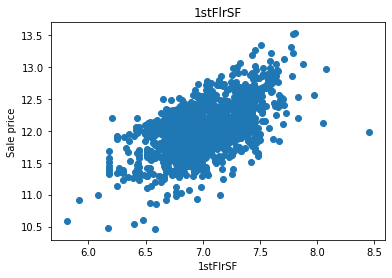

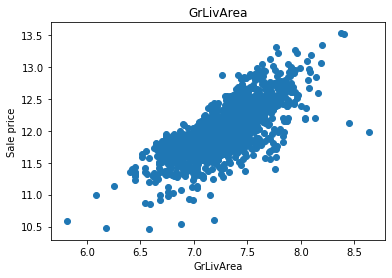

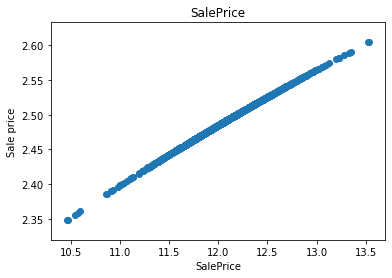

In [39]:
for var in containingContinousVars:
    analyseDistributedDataWithSaleprice(data, var)

# Outliers

In [40]:
def findOutliers(df, var):
    if 0 in df[var].unique():
        return
    df = df.copy()
    df[var] = np.log(df[var])
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()

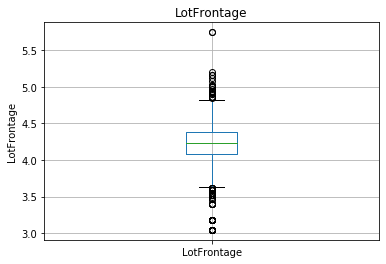

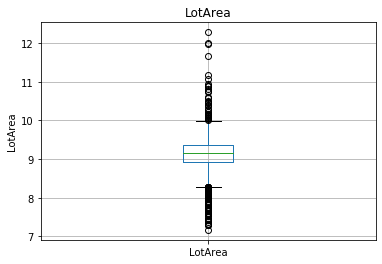

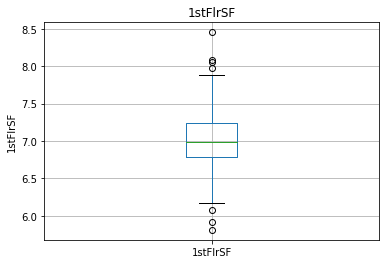

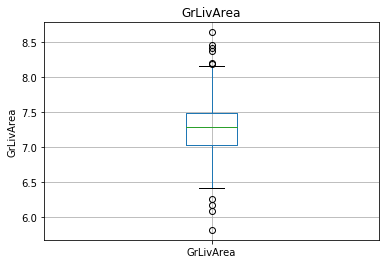

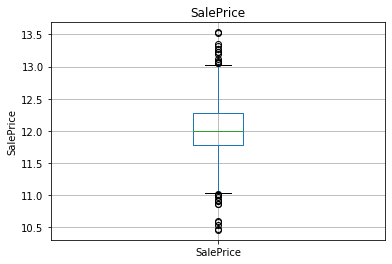

In [41]:
for var in containingContinousVars:
    findOutliers(data, var)

# Categorical Variable

In [42]:
containingCategoricalVars = []

In [43]:
for key, value in data.iteritems():
    if value.dtype == object:
        containingCategoricalVars.append(key)

In [44]:
containingCategoricalVars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [45]:
print(len(containingCategoricalVars))

43


In [46]:
for var in containingCategoricalVars:
    print("{}: {} cardinality".format(var.ljust(15), len(data[var].unique())))

MSZoning       : 5 cardinality
Street         : 2 cardinality
Alley          : 3 cardinality
LotShape       : 4 cardinality
LandContour    : 4 cardinality
Utilities      : 2 cardinality
LotConfig      : 5 cardinality
LandSlope      : 3 cardinality
Neighborhood   : 25 cardinality
Condition1     : 9 cardinality
Condition2     : 8 cardinality
BldgType       : 5 cardinality
HouseStyle     : 8 cardinality
RoofStyle      : 6 cardinality
RoofMatl       : 8 cardinality
Exterior1st    : 15 cardinality
Exterior2nd    : 16 cardinality
MasVnrType     : 5 cardinality
ExterQual      : 4 cardinality
ExterCond      : 5 cardinality
Foundation     : 6 cardinality
BsmtQual       : 5 cardinality
BsmtCond       : 5 cardinality
BsmtExposure   : 5 cardinality
BsmtFinType1   : 7 cardinality
BsmtFinType2   : 7 cardinality
Heating        : 6 cardinality
HeatingQC      : 5 cardinality
CentralAir     : 2 cardinality
Electrical     : 6 cardinality
KitchenQual    : 4 cardinality
Functional     : 7 cardinality
Firep

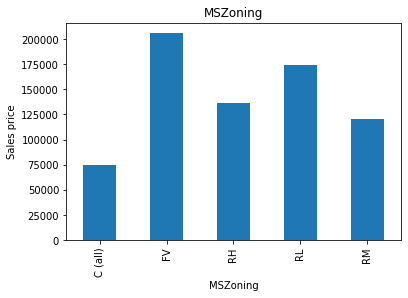

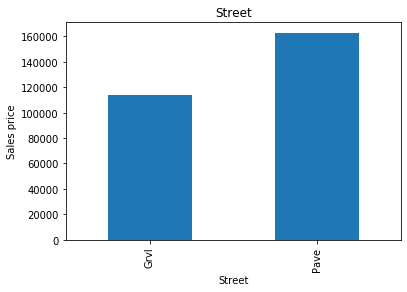

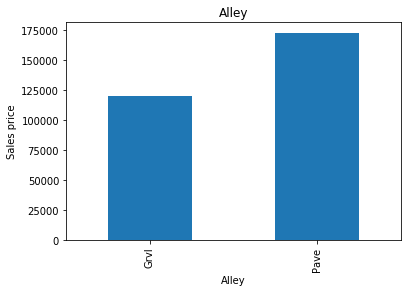

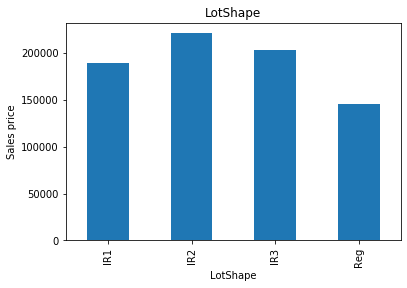

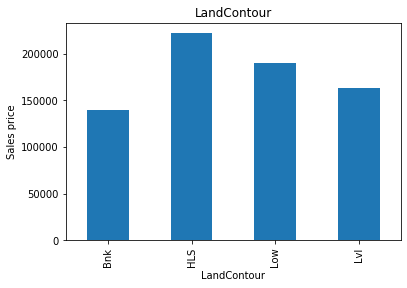

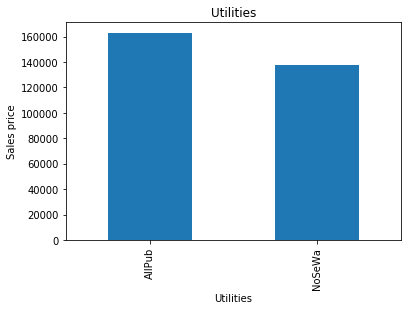

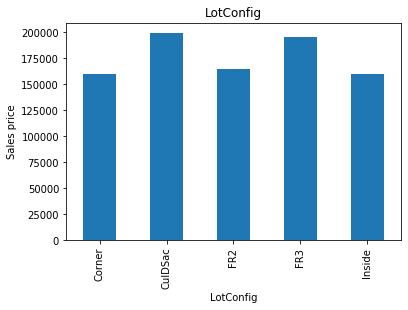

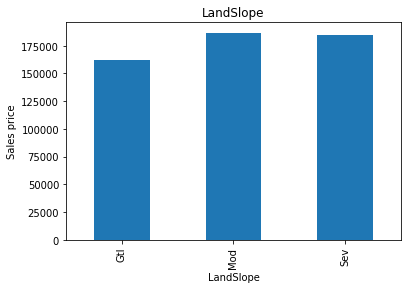

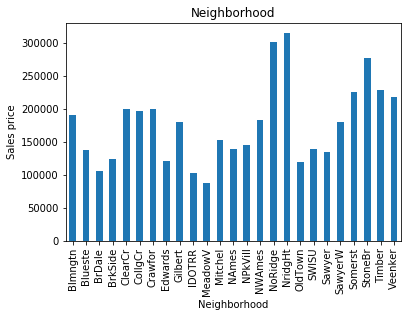

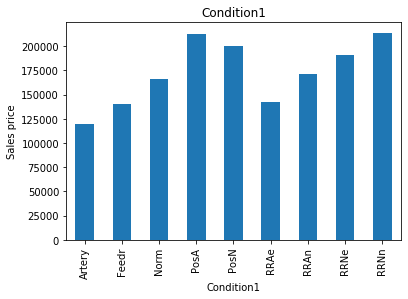

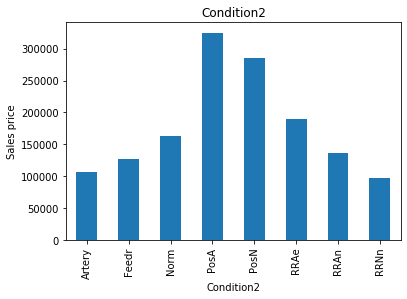

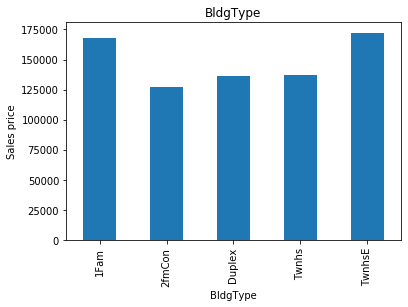

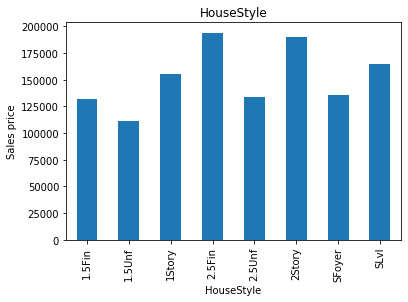

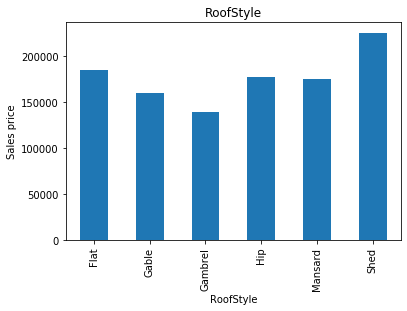

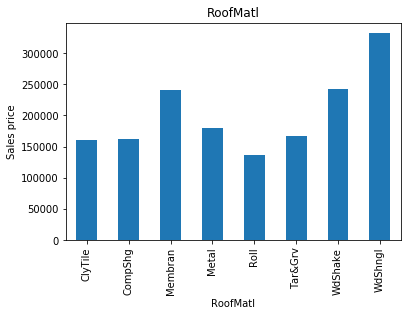

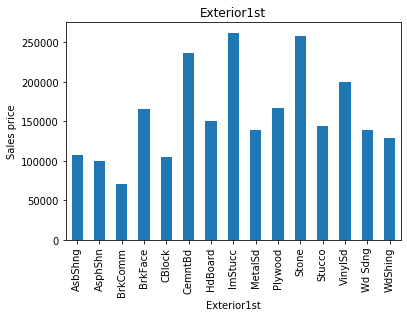

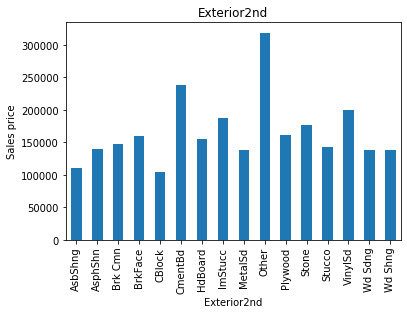

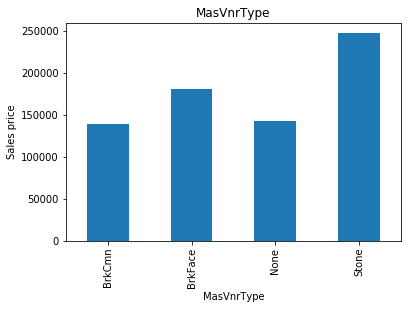

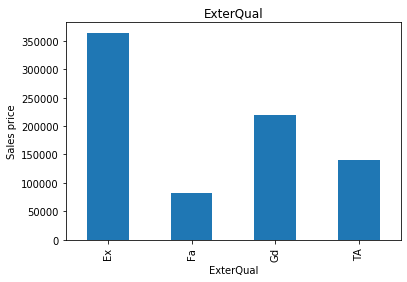

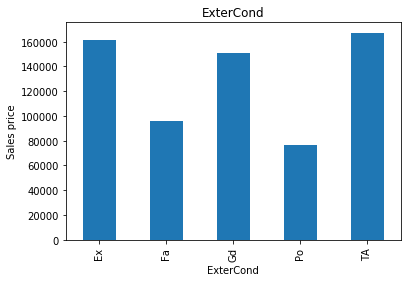

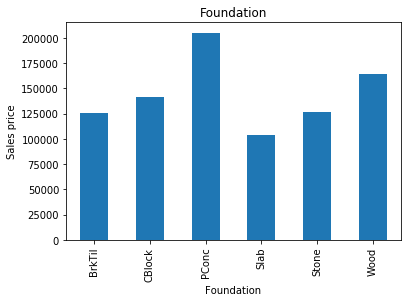

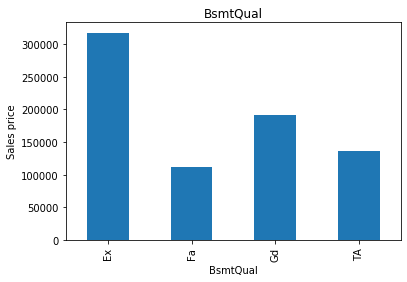

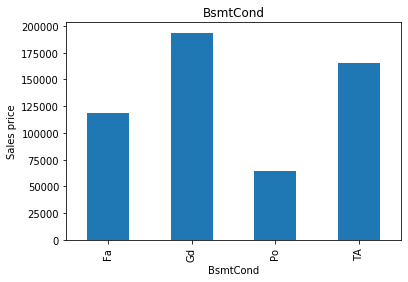

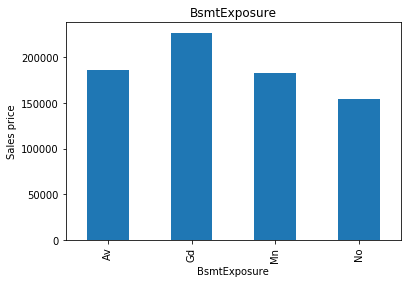

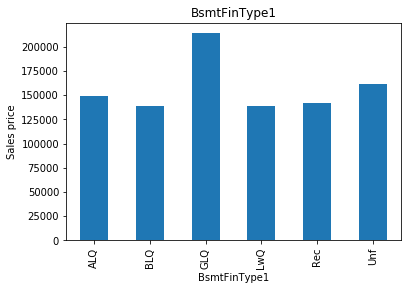

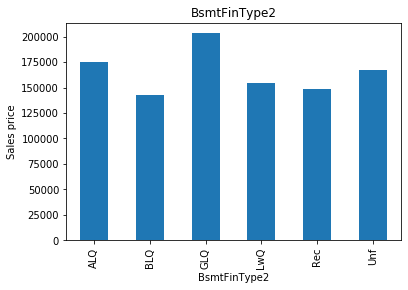

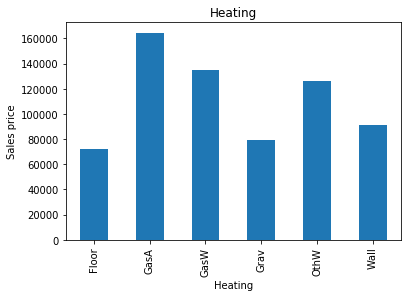

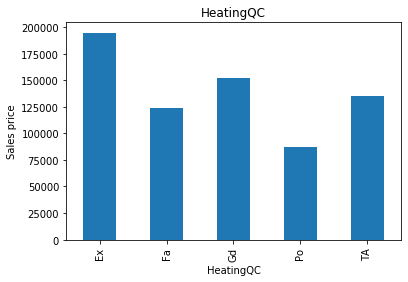

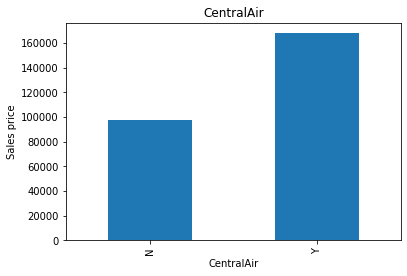

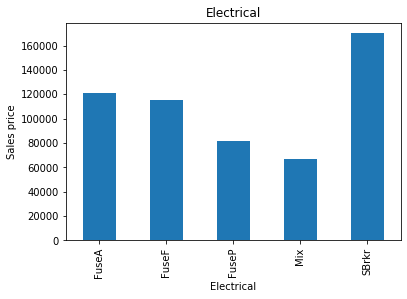

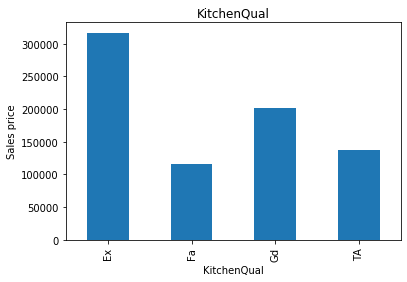

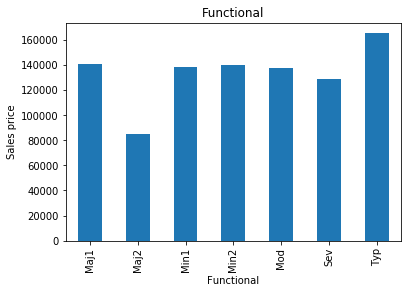

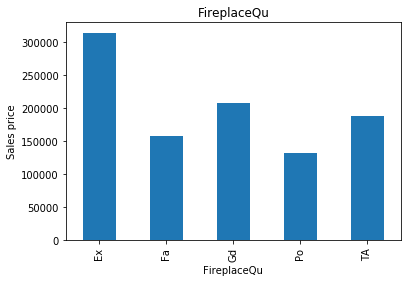

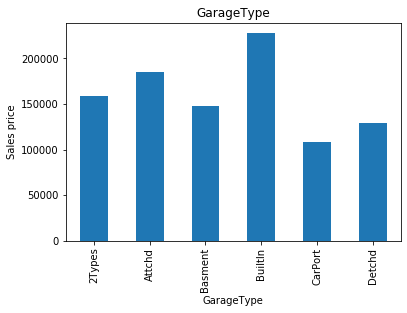

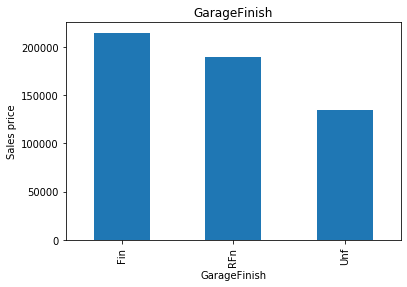

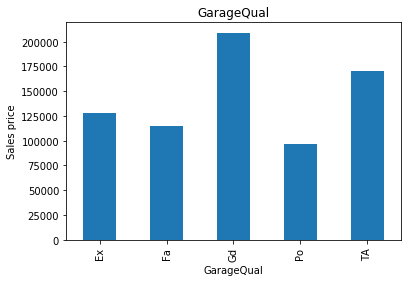

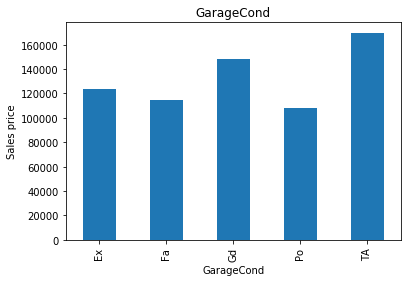

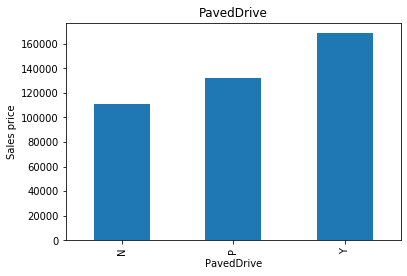

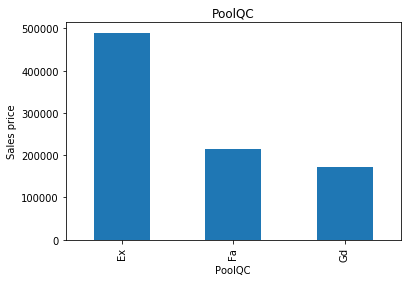

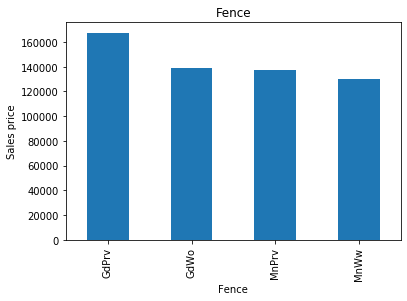

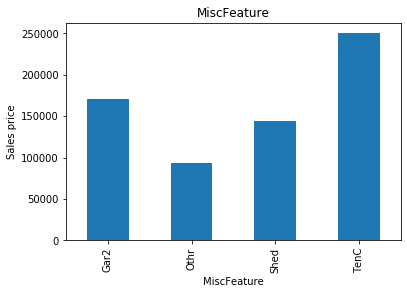

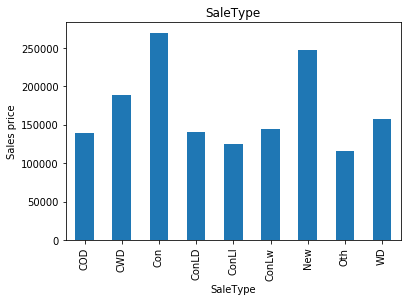

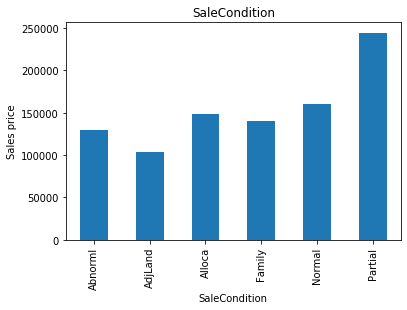

In [47]:
for var in containingCategoricalVars:
    relationship_discrete_vars_and_salesprice(data, var)